In [38]:
from skimage import img_as_uint, img_as_ubyte, img_as_bool, img_as_float
from skimage.io import imread, imshow, imsave, find_available_plugins
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity
from skimage.viewer import ImageViewer
from skimage.filters import try_all_threshold, gabor, threshold_otsu, threshold_mean, threshold_minimum, \
threshold_local, frangi, gaussian  
from skimage.morphology import skeletonize, skeletonize_3d, thin, disk
from skimage.util import invert
from skimage.feature import canny, orb
from skimage.filters.rank import enhance_contrast, autolevel
from skimage.segmentation import felzenszwalb
from PIL import Image, ImageDraw
import shutil 

import os
import numpy as np
#sns.set(style='whitegrid')
import json

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = {'png', 'retina'}

In [39]:
%matplotlib inline

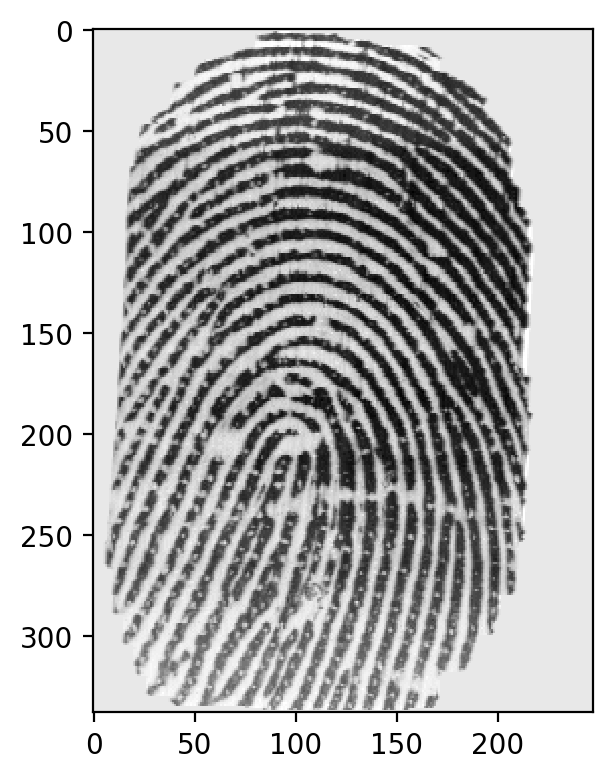

In [40]:
img = imread("data/raw_data/png/2_8.png", as_grey = True)
imshow(img)

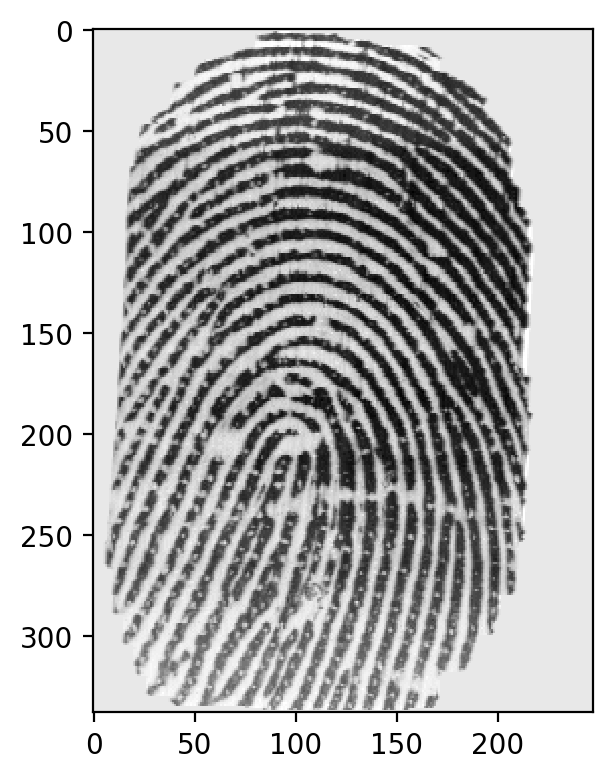

In [41]:
img_intensity_scale = rescale_intensity(img, in_range= "dtype")

imshow(img_intensity_scale)

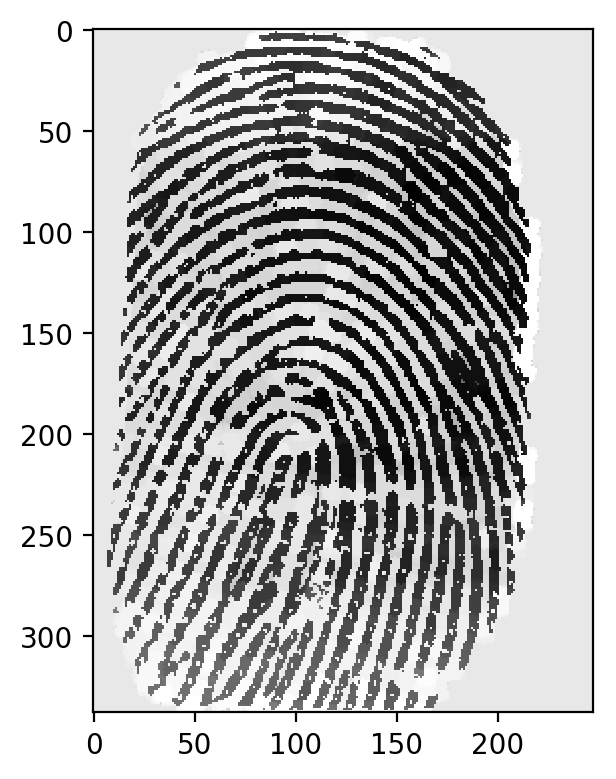

In [42]:
img_enhanced_contrast = enhance_contrast(img_intensity_scale, disk(5))

imshow(img_enhanced_contrast)

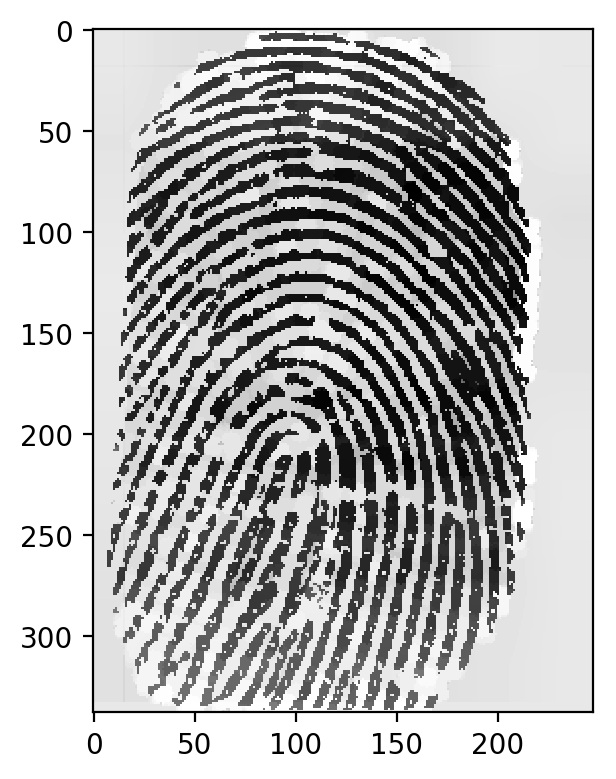

In [43]:
img_equalized = equalize_adapthist(img_enhanced_contrast, clip_limit= 0.01)
imshow(img_equalized)

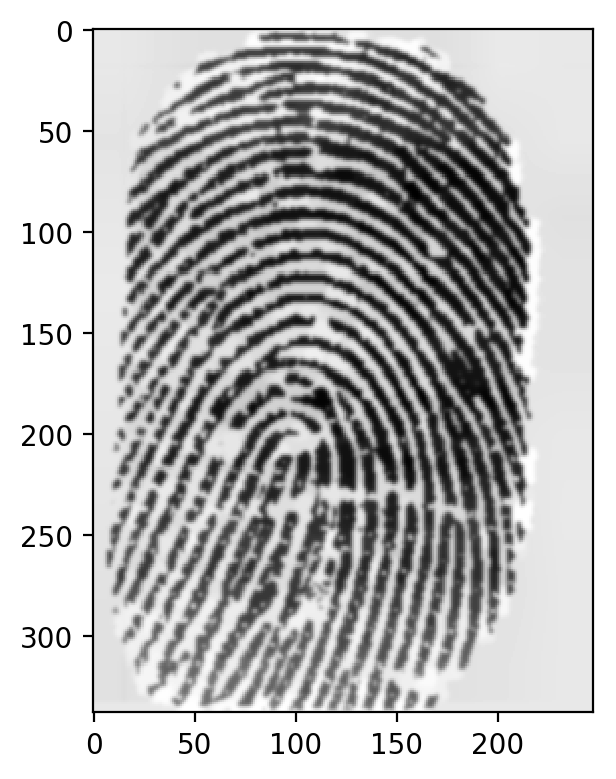

In [44]:
img_smoothed = gaussian(img_equalized)

imshow(img_smoothed)

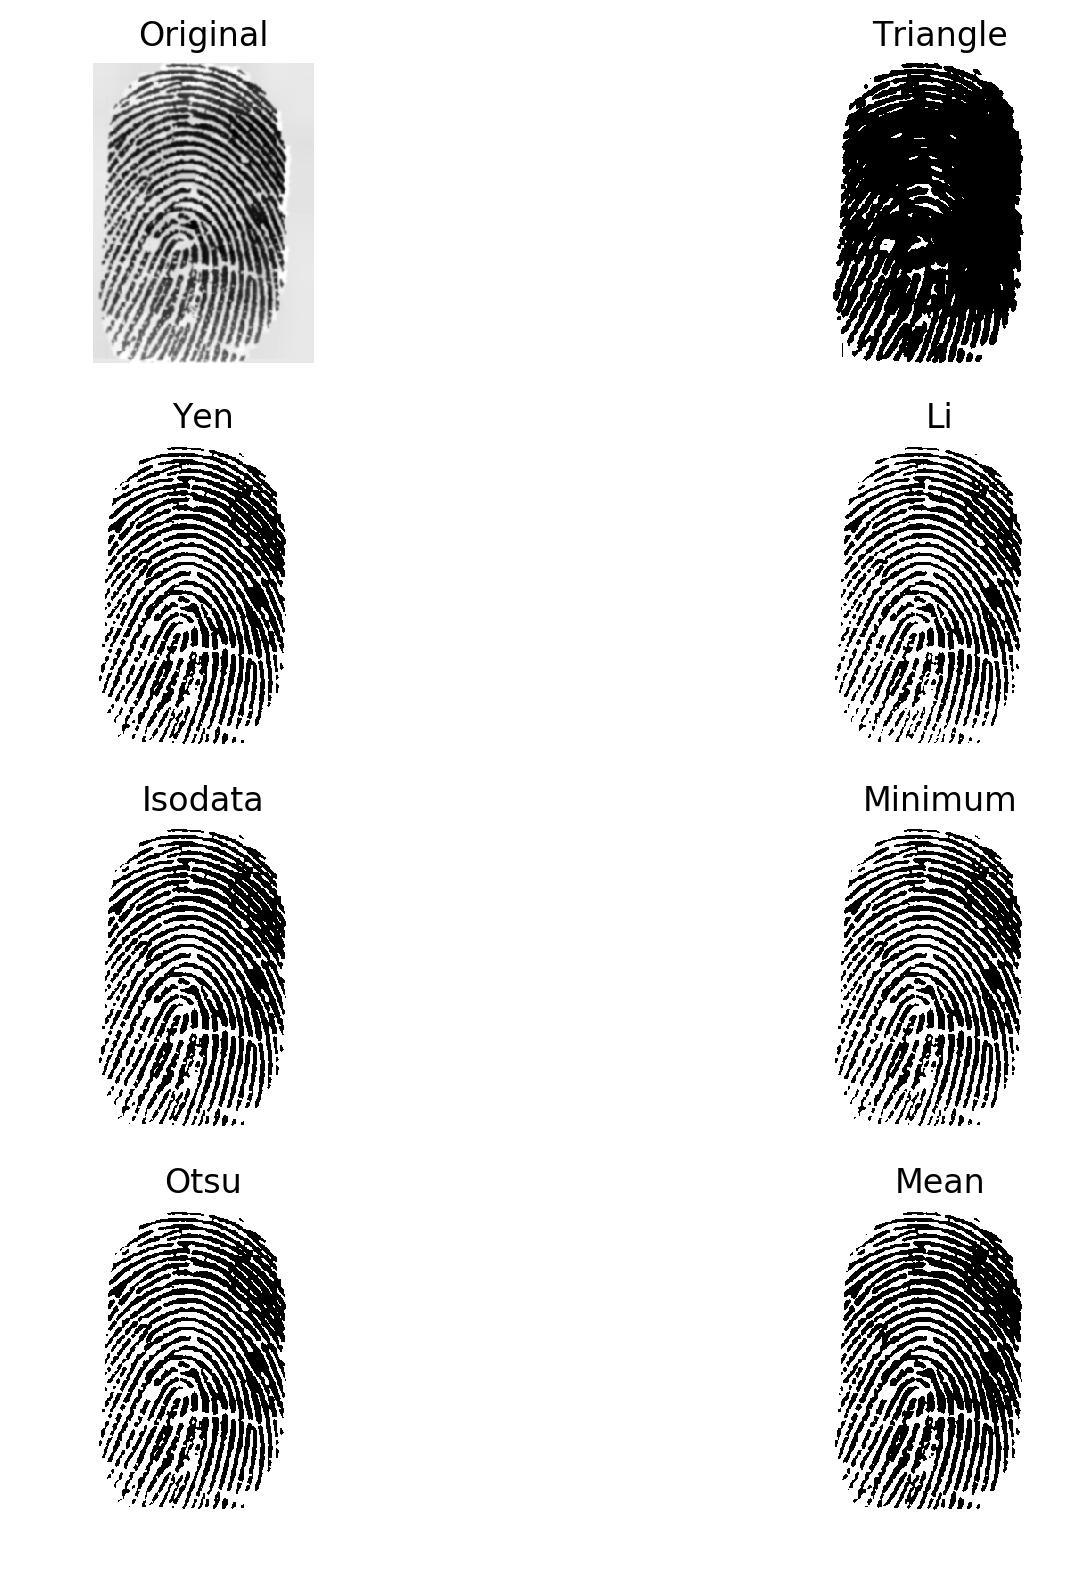

In [45]:
fig, ax = try_all_threshold(img_smoothed, figsize=(10, 8), verbose=False)
plt.show()

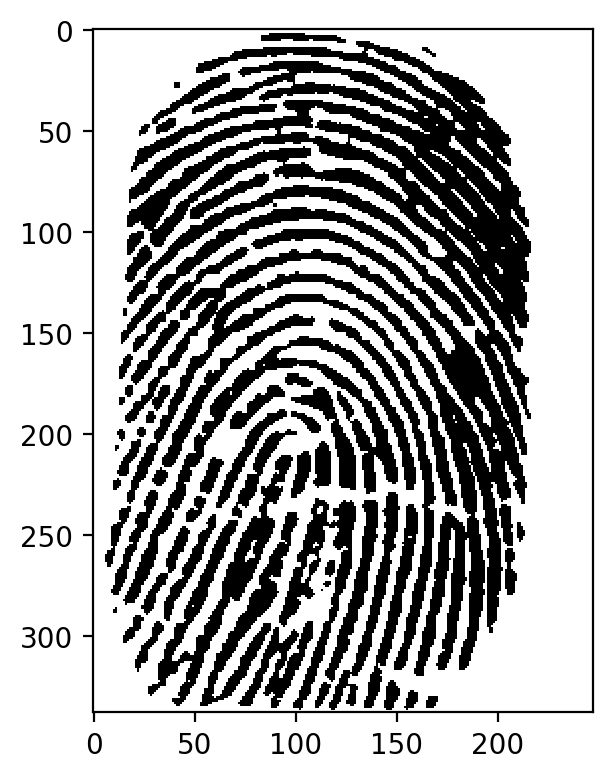

In [58]:
thresh_local = threshold_local(img_smoothed, 125, 'mean', mode = "reflect")
img_binarized = img_smoothed > thresh_local

imshow(img_binarized)

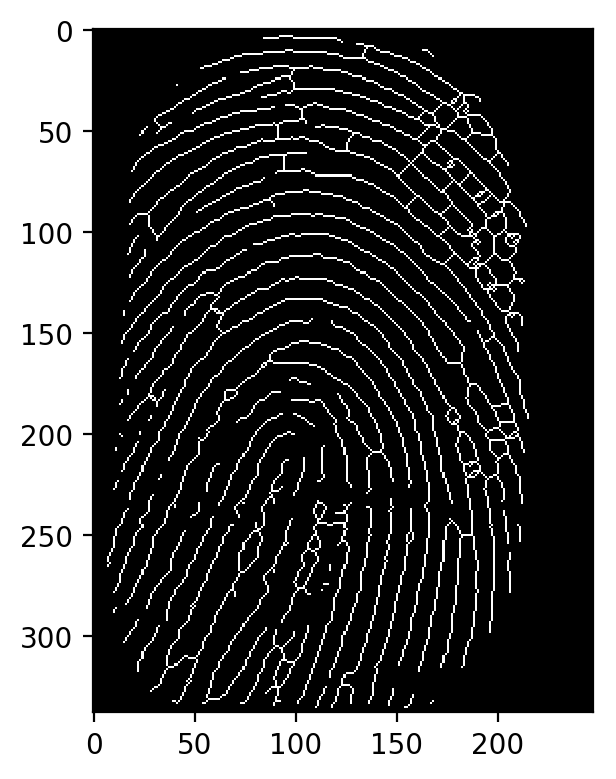

In [59]:
img_thinned = thin(invert(img_binarized))

imshow(img_thinned)

In [60]:
im = imread("examples/1_1_preprocessed.png")